In [1]:
import ThreeD_Net_Tools_0203 as D3

import sys
import math
import numpy as np #v 1.23.3
import networkx as nx
import matplotlib.cm as cm
import matplotlib
import argparse
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from networkx.algorithms import community
import community
from community import community_louvain #conda install python-louvain
from PIL import Image
import os
import scipy
from numpy import roots
import random
import ast
import pickle

#%matplotlib notebook

In [2]:
USR='LUKE'

In [3]:
#os.getcwd()
list_paths_skl=[]
list_paths_vol=[]
if USR=='LUKE':
    ALL_ANALYSIS='ALL_GAUDI.csv'#finalfilename
    #directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/03-05-23_4"
    directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2"
    clean_Gs=directory+'/GRAPHS/CLEANED'
    dir_G=clean_Gs+"/BASE"
    dir_G_widths=clean_Gs+'/WIDTH'
    dir_G_widths_o=clean_Gs+'/WIDTH_O'
    pickle_f=directory+"/_keyed_nodes.pickle"
    
    os.chdir(directory)
    #os.chdir("/media/ll16598/One Touch/CT_ANALYSIS/")
    #VOXEL_SIZES = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VOXEL_SIZES.csv')

elif USR=='SUPER':
    directory="/media/cf19810/One Touch/CT_ANALYSIS"
    dir_G="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/BASE"
    dir_G_inverted='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/INVERTED'
    dir_G_widths='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/WIDTHS'
    dir_G_widths_inverted='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/WIDTHS_INVERTED'
    dir_G_short="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SHORT"
    dir_G_spatial="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SPATIAL"
    dir_G_short_widths="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SHORT_WIDTH"
    dir_G_spatial_widths="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SPATIAL_WIDTH"
    
    os.chdir("/media/cf19810/One Touch/CT_ANALYSIS")
    VOXEL_SIZES = pd.read_csv('/home/cf19810/Documents/LUKE/VOXEL_SIZES.csv')

In [4]:
TREATS = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/COLONY_INFO.csv')
analysis_df=TREATS

In [5]:
name_list=[]
for i in TREATS['name']:
    name_list.append(i)

In [6]:
# dir_G='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/GRAPHS/WIDTHS'
# dir_G_short='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/GRAPHS/SHORT_WIDTH'
# dir_G_spatial='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/GRAPHS/SPATIAL_WIDTH'

ENSURE YOU ARE RUNNING THE CORRECT GRAPHS. WIDTHS OR INVERTED.

In [7]:
files_width = [ f.path for f in os.scandir(dir_G_widths_o)]
files = [ f.path for f in os.scandir(dir_G)]

#files_spatial = [ f.path for f in os.scandir(dir_G_spatial)]

In [185]:

G_list_length=[]
all_names=[]
l=0
while l<len(files) and len(G_list_length)<100:
    for file in range(0,len(files)):
        day=os.path.basename(files[file])
        filename = "_".join(day.split("_")[:2])  # Split by underscore, take first two parts, join with underscore
        #print(file)

        if filename == name_list[l]:
            G=nx.read_graphml(files[file])
            Gs = sorted(nx.connected_components(G), key=len, reverse=True)
            Gmax = G.subgraph(Gs[0])
            attributes = nx.get_node_attributes(Gmax, 'TYPE')

                                     
            G_list_length.append(Gmax)
            print(filename)
            all_names.append(filename)
            l+=1
        else:
            l+=0

R1C1SK_TUE
R1C1SK_WED
R1C1SK_THU
R1C1SK_FRI
R1C1SK_MON
R1C2PM_TUE
R1C2PM_WED
R1C2PM_THU
R1C2PM_FRI
R1C2PM_MON
R2C1PK_TUE
R2C1PK_WED
R2C1PK_THU
R2C1PK_FRI
R2C1PK_MON
R2C2SM_TUE
R2C2SM_WED
R2C2SM_THU
R2C2SM_FRI
R2C2SM_MON
R3C1SK_TUE
R3C1SK_WED
R3C1SK_THU
R3C1SK_FRI
R3C1SK_MON
R3C2PM_TUE
R3C2PM_WED
R3C2PM_THU
R3C2PM_FRI
R3C2PM_MON
R4C1PK_TUE
R4C1PK_WED
R4C1PK_THU
R4C1PK_FRI
R4C1PK_MON
R4C2SM_TUE
R4C2SM_WED
R4C2SM_THU
R4C2SM_FRI
R4C2SM_MON
R5C1SK_TUE
R5C1SK_WED
R5C1SK_THU
R5C1SK_FRI
R5C1SK_MON
R5C2PM_TUE
R5C2PM_WED
R5C2PM_THU
R5C2PM_FRI
R5C2PM_MON
R6C1PK_TUE
R6C1PK_WED
R6C1PK_THU
R6C1PK_FRI
R6C1PK_MON
R6C2SM_TUE
R6C2SM_WED
R6C2SM_THU
R6C2SM_FRI
R6C2SM_MON
R7C1SK_TUE
R7C1SK_WED
R7C1SK_THU
R7C1SK_FRI
R7C1SK_MON
R7C2PM_TUE
R7C2PM_WED
R7C2PM_THU
R7C2PM_FRI
R7C2PM_MON
R8C1PL_TUE
R8C1PL_WED
R8C1PL_THU
R8C1PL_FRI
R8C1PL_MON
R8C2SL_TUE
R8C2SL_WED
R8C2SL_THU
R8C2SL_FRI
R8C2SL_MON
R9C1SL_TUE
R9C1SL_WED
R9C1SL_THU
R9C1SL_FRI
R9C1SL_MON
R9C2PL_TUE
R9C2PL_WED
R9C2PL_THU
R9C2PL_FRI
R9C2PL_MON
R10C1PL_TU

IndexError: list index out of range

In [ ]:

G_list_width=[]
all_names=[]
l=0
while l<len(files) and len(G_list_width)<100:
    for file in range(0,len(files_width)):
        day=os.path.basename(files_width[file])
        filename = "_".join(day.split("_")[:2])  # Split by underscore, take first two parts, join with underscore
        #print(file)

        if filename == name_list[l]:
            G=nx.read_graphml(files_width[file])
            Gs = sorted(nx.connected_components(G), key=len, reverse=True)
            Gmax = G.subgraph(Gs[0])
            attributes = nx.get_node_attributes(Gmax, 'TYPE')

                                     
            G_list_width.append(Gmax)
            print(filename)
            all_names.append(filename)
            l+=1
        else:
            l+=0

first get tortuosity, +sd
then width +sd
then reassign tunnels to same degree distribution
randomly reassign chambers to non-nest entrance nodes with d>2
do for full it

In [140]:
'''(a1,a2,a3)________________(b1,b2,b3)
A                           B 


and second line 
(c1,c2,c3)________________(d1,d2,d3)
C                            D

a1+t(b1-a1)=c1+s(d1-c1)
a2+t(b2-a2)=c2+s(d2-c2)
a3+t(b3-a3)=c3+s(d3-c3)'''

def line_intersection(coord1, coord2, coord3, coord4, thrsh):
    ly=0
    a1, a2, a3 =coord1
    b1, b2, b3 =coord2
    c1, c2, c3 =coord3
    d1, d2, d3 =coord4
    A=b1-a1
    B=c1-d1
    C=c1-a1
    D=b2-a2
    E=c2-d2
    F=c2-a2
    try:
        t=(C*E-F*B)/(E*A-B*D)
    except ZeroDivisionError:
        return ly
    s=(D*C-A*F)/(D*B-A*E)
    #print(t)
    if ((t*(b3-a3)+s*(c3-d3))==c3-a3):
        #print(t)
        if(thrsh<=t<=1 and thrsh<=s<=1):
            ly+=1
    return ly

def random_edge_swapping(G, Gw, num_swaps, tort_list, width_list):
    H = G.copy()  # Create a copy of the graph
    Hw = Gw.copy()  # Create a copy of the weighted graph
    nodes = list(H.nodes())
    
    for _ in range(num_swaps):
        # Select two distinct edges for swapping
        edge1 = random.choice(list(H.edges()))
        edge2 = random.choice(list(H.edges()))
        while edge1 == edge2 or any(node in edge1 for node in edge2):
            edge2 = random.choice(list(H.edges()))
        
        # Perform edge swapping
        u, v = edge1
        x, y = edge2
        if len({u, v, x, y}) == 4:  # Ensure four distinct nodes
            H.remove_edge(*edge1)
            Hw.remove_edge(*edge1)
            H.remove_edge(*edge2)
            Hw.remove_edge(*edge2)
            
            # Calculate new weights and add new edges
            dist1 = D3.calculate_distance(ast.literal_eval(H.nodes[u]['coord']), ast.literal_eval(H.nodes[x]['coord']))
            tort1 = random.choice(tort_list)
            width1 = random.choice(width_list)
            H.add_edge(u, x, weight=dist1 * tort1)
            Hw.add_edge(u, x, weight=width1)
            
            dist2 = D3.calculate_distance(ast.literal_eval(H.nodes[v]['coord']), ast.literal_eval(H.nodes[y]['coord']))
            tort2 = random.choice(tort_list)
            width2 = random.choice(width_list)
            H.add_edge(v, y, weight=dist2 * tort2)
            Hw.add_edge(v, y, weight=width2)
            
    return H, Hw
import itertools



In [360]:
import itertools
import ast
import random

def preferential_edge_swapping(G, Gw, num_swaps, tort_list, width_list):
    H = G.copy()  # Create a copy of the graph
    Hw = Gw.copy()  # Create a copy of the weighted graph
    nodes = list(H.nodes())
    completed_swaps=[]
    original_degrees = {node: H.degree(node) for node in nodes}
    swaps=0
    while swaps < num_swaps:
        # Calculate distances between all possible pairs of nodes that are not already connected
        distances = []
        for u, v in itertools.combinations(nodes, 2):
            if u not in H.neighbors(v):
                dist = D3.calculate_distance(ast.literal_eval(H.nodes[u]['coord']), ast.literal_eval(H.nodes[v]['coord']))
                distances.append((dist, u, v))
        
        # Sort the list of distances and select the pair with the smallest distance
        if tuple([u,v]) in completed_swaps or tuple([v,u]) in completed_swaps:
            swaps+=1
            continue
        distances.sort()
        if not distances:
            break  # Break if there are no more pairs to connect
        
          # Select the pair with the smallest distance
        ind=0
        dist, u, v = distances[ind]

        
        cross=True
        while cross==True:
            dist, u, v = distances[ind]
            width = random.choice(width_list)
            cr=0
            for x, y in itertools.combinations(nodes, 2):
                if x==u or x==v or y==u or y==v:
                    continue
            mid1= D3.midpoint_node(ast.literal_eval(H.nodes[u]['coord']), \
                                       ast.literal_eval(H.nodes[v]['coord']))
            mid2=D3.midpoint_node(ast.literal_eval(H.nodes[x]['coord']), \
                                       ast.literal_eval(H.nodes[y]['coord']))
            dist=D3.calculate_distance(mid1, mid2)
            
            if dist<width*2:
                cr+=1
            if cr==0:
                cross=False
                break
            else:
                ind+=1        
#         cross=True
#         while cross==True:
#             dist, u, v = distances[ind]
#             cr=0
#             for x, y in itertools.combinations(nodes, 2):
#                 if x==u or x==v or y==u or y==v:
#                     continue
#                 ly = line_intersection(ast.literal_eval(H.nodes[u]['coord']), \
#                                        ast.literal_eval(H.nodes[v]['coord']), 
#                                       ast.literal_eval(H.nodes[x]['coord']), \
#                                        ast.literal_eval(H.nodes[y]['coord']), 0)
#                 cr+=ly
#             if cr==0:
#                 cross=False
#                 break
#             else:
#                 ind+=1
        
        completed_swaps.append(tuple([u, v]))
        completed_swaps.append(tuple([v, u]))

        tort = random.choice(tort_list)
        H.add_edge(u, v, weight=dist * tort)
        Hw.add_edge(u, v, weight=width)
        
        # Remove an edge from 'u' or 'v' while maintaining the original degree
        u_neighbors = [neighbor for neighbor in H.neighbors(u) if H.degree(neighbor) > original_degrees[neighbor]]
        v_neighbors = [neighbor for neighbor in H.neighbors(v) if H.degree(neighbor) > original_degrees[neighbor]]
        
        if u_neighbors:
            edge_to_remove = (u, random.choice(u_neighbors))
        elif v_neighbors:
            edge_to_remove = (v, random.choice(v_neighbors))
        else:
            # If unable to remove an edge while maintaining the original degree, remove the added edge and continue
            H.remove_edge(u, v)
            Hw.remove_edge(u, v)
            continue
        #print('swaps completed:', swaps)
        swaps+=1
        H.remove_edge(*edge_to_remove)
        Hw.remove_edge(*edge_to_remove)
    print('edges swapped!')
 
    return H, Hw


In [361]:

from scipy.spatial import ConvexHull, Delaunay

In [362]:
min_distance=0.4
thrsh=0
n_swap=200

In [ ]:
randomisations=10
wed_seq = [96 - i*5 for i in range(20)]
wed_seq.reverse()
mon_seq = [99 - i*5 for i in range(20)]
mon_seq.reverse()
wed_mon_gs=wed_seq+mon_seq
ran=0
num_swaps=10
new_g_list_length=[]
new_g_list_width=[]
while ran<randomisations:
    for g in range(0, len(wed_mon_gs)):
        
        k=wed_mon_gs[g]
        
        if 'P' in all_names[k]:
            continue
        G=G_list_length[k].copy()
        Gw=G_list_width[k].copy()
        xmin=100
        xmax=0
        ymin=100
        ymax=0
        zmin=100
        zmax=0
        attributes = nx.get_node_attributes(G, 'TYPE')
        nes = [node for node, type_value in attributes.items() if type_value == 'NEST EN']
        ends = [node for node, type_value in attributes.items() if type_value == 'END']
        ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        for node in G.nodes():
            x,y,z =ast.literal_eval(G.nodes[node]['coord'])
            if x>xmax:
                xmax=x
            if x<xmin:
                xmin=x
            if y>ymax:
                ymax=y
            if y<ymin:
                ymin=y
            if z>zmax:
                zmax=z
            if z<zmin:
                zmin=z

            #reassign coords
        assigned_nodes = []
        new_coords = []
#         def distance(coord1, coord2):
#             return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2 + (coord1[2] - coord2[2]) ** 2)

        # Shuffle coordinates for each node
        original_coords = [ast.literal_eval(G.nodes[node]['coord']) for node in G.nodes()]

        # Compute the 3D Convex Hull
        hull = ConvexHull(original_coords)

        # Compute Delaunay triangulation of the convex hull points
        deln = Delaunay(hull.points)

        # Minimum distance between nodes in cm
        min_distance = 0.4

        # List to hold the new coordinates
        new_coords = []

        # Shuffle coordinates for each node
        for node in G.nodes():
            while True:

                if node in nes:
                    xo,yo,z=ast.literal_eval(G.nodes[node]['coord']) 
                    x = random.uniform(xmin, xmax)
                    y = random.uniform(ymin, ymax)
                    # Check the distance with all previously generated coordinates
                    is_valid = all(D3. calculate_distance(tuple([x, y, z]), coord) >= min_distance for coord in new_coords)
                    if is_valid:
                        # Update the coordinate of the node in the graph
                        G.nodes[node]['coord'] = str(tuple([x, y, z]))

                        # Add the new coordinate to the list
                        new_coords.append(tuple([x, y, z]))
                        break
                else:

                    # Generate random coordinates within the convex hull using barycentric coordinates
                    simplex = random.choice(hull.simplices)
                    vertices = hull.points[simplex]
                    weights = np.random.rand(len(vertices))
                    weights /= weights.sum()
                    point = np.dot(weights, vertices)

                    # Check the distance with all previously generated coordinates
                    is_valid = all(D3.calculate_distance(tuple(point), tuple(coord)) >= min_distance for coord in new_coords)

                    if is_valid:
                        # Update the coordinate of the node in the graph
                        G.nodes[node]['coord'] = str(tuple(point))

                        # Add the new coordinate to the list
                        new_coords.append(tuple(point))
                    break
        print('graph coords reassigned within convex hull!')
        tort_list=[]
        width_list=[]
        for (u, v, data) in G.edges(data=True):
            dist = D3.calculate_distance(ast.literal_eval(G.nodes[u]['coord']),\
                                                        ast.literal_eval(G.nodes[v]['coord']))
            length = data['weight']
            tort=length/dist
            tort_list.append(tort)
        for (u, v, data) in Gw.edges(data=True):
            width = data['weight']
            width_list.append(width)
        H=G.copy()
        Hw=Gw.copy()
        for (u, v, data) in G.edges(data=True):
            dist = D3.calculate_distance(ast.literal_eval(G.nodes[u]['coord']),\
                                                        ast.literal_eval(G.nodes[v]['coord']))
            tory = random.choice(tort_list)
            H.add_edge(u, v, weight=dist * tort)
            width=random.choice(width_list)
            Hw.add_edge(u, v, weight=width)
            
        n_swap=len(width_list)
        G_new, Gw_new = preferential_edge_swapping(G, Gw, num_swaps=n_swap, tort_list=tort_list, \
                                                   width_list=width_list)
        connected_components = sorted(nx.connected_components(G_new), key=len, reverse=True)

        # Identify the largest connected component
        largest_component = connected_components[0]

        # Connect smaller components to the largest component#
        while len(connected_components)>1:

            for component in connected_components[1:]:
                min_distance = float('inf')
                selected_nodes = (None, None)

                for node1 in component:
                    for node2 in largest_component:
                        if node2 in ends:
                            continue
                        distance = D3.calculate_distance(ast.literal_eval(G_new.nodes[node1]['coord']), \
                                                         ast.literal_eval(G_new.nodes[node2]['coord']))
                        if distance < min_distance:
                            min_distance = distance
                            selected_nodes = (node1, node2)
                tort=random.choice(tort_list)
                length=min_distance*tort
                width=random.choice(width_list)
                if node1==node2:
                    break
                # Create an edge between the closest nodes
                G_new.add_edge(*selected_nodes, weight=length)
                Gw_new.add_edge(*selected_nodes, weight=width)
                connected_components = sorted(nx.connected_components(G_new), key=len, reverse=True)
                # Identify the largest connected component
                largest_component = connected_components[0]
                # Update the components as the current component is now connected to the largest component
        
        random_juncs=[]
        while len(random_juncs)<len(ALL_CHAM_NUMS):
            rj=random.choice(ALL_JUNC_NUMS)
            if rj not in random_juncs:
                random_juncs.append(rj)
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_new, {node: {'TYPE': 'JUNC'}})
            nx.set_node_attributes(Gw_new, {node: {'TYPE': 'JUNC'}})

        for node in random_juncs:
            nx.set_node_attributes(G_new, {node: {'TYPE': 'CHAM'}})
            nx.set_node_attributes(Gw_new, {node: {'TYPE': 'CHAM'}})

        new_g_list_length.append(G_new)
        new_g_list_width.append(Gw_new)
        print(nx.degree(G_new))
    ran+=1
        


graph coords reassigned within convex hull!
edges swapped!
[('38', 3), ('57', 3), ('27', 3), ('39', 3), ('30', 1), ('54', 3), ('36', 3), ('26', 3), ('24', 3), ('56', 3), ('19', 3), ('59', 3), ('50', 4), ('31', 4), ('17', 3), ('33', 4), ('25', 3), ('23', 3), ('42', 3), ('58', 3), ('60', 3), ('49', 3), ('28', 3), ('35', 3), ('51', 6), ('29', 1), ('45', 3), ('43', 1), ('18', 3), ('21', 1), ('34', 3), ('46', 1), ('55', 1), ('48', 1), ('53', 3), ('44', 1), ('2', 3), ('16', 1), ('20', 1), ('40', 1), ('32', 1), ('22', 3), ('52', 1), ('47', 3), ('41', 1), ('37', 1)]
graph coords reassigned within convex hull!
edges swapped!
[('168', 3), ('165', 4), ('131', 4), ('195', 3), ('155', 3), ('61', 3), ('143', 3), ('95', 3), ('85', 3), ('22', 3), ('18', 3), ('110', 3), ('167', 3), ('141', 3), ('92', 3), ('81', 3), ('136', 3), ('161', 3), ('48', 3), ('55', 3), ('80', 3), ('182', 3), ('15', 4), ('123', 3), ('197', 4), ('137', 4), ('83', 3), ('193', 3), ('4', 3), ('162', 3), ('6', 3), ('94', 3), ('20', 5

/tmp/ipykernel_144195/3720671818.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  tort=length/dist


edges swapped!
[('28', 3), ('61', 3), ('55', 3), ('43', 3), ('49', 3), ('65', 3), ('56', 3), ('54', 3), ('27', 3), ('10', 4), ('41', 3), ('48', 1), ('45', 3), ('12', 3), ('68', 3), ('39', 3), ('64', 3), ('62', 3), ('58', 3), ('7', 3), ('66', 3), ('1', 1), ('29', 1), ('59', 5), ('44', 3), ('13', 3), ('18', 3), ('40', 3), ('63', 3), ('57', 1), ('30', 1), ('14', 3), ('24', 3), ('42', 1), ('31', 1), ('51', 3), ('11', 3), ('67', 1), ('9', 1), ('50', 1), ('52', 1), ('19', 1), ('37', 1), ('2', 1), ('70', 1), ('60', 1), ('6', 1)]
graph coords reassigned within convex hull!
edges swapped!
[('28', 3), ('42', 3), ('19', 3), ('15', 3), ('35', 3), ('16', 4), ('7', 3), ('36', 3), ('18', 3), ('5', 3), ('6', 3), ('25', 3), ('31', 3), ('40', 3), ('34', 5), ('43', 3), ('11', 1), ('41', 3), ('1', 3), ('2', 1), ('38', 3), ('37', 3), ('32', 1), ('24', 3), ('26', 1), ('39', 1), ('27', 3), ('33', 1), ('14', 3), ('23', 1), ('29', 1), ('22', 3), ('30', 1), ('21', 1), ('9', 1)]
graph coords reassigned within co

edges swapped!
[('34', 3), ('96', 3), ('76', 3), ('66', 3), ('75', 5), ('72', 3), ('10', 4), ('93', 3), ('4', 5), ('32', 3), ('94', 4), ('86', 3), ('23', 3), ('95', 1), ('46', 3), ('17', 3), ('20', 1), ('21', 3), ('79', 1), ('73', 3), ('99', 4), ('22', 3), ('14', 3), ('100', 3), ('70', 3), ('89', 1), ('41', 3), ('57', 3), ('77', 1), ('11', 3), ('12', 3), ('85', 3), ('15', 3), ('80', 3), ('91', 3), ('51', 3), ('68', 3), ('43', 3), ('63', 3), ('58', 3), ('83', 5), ('54', 6), ('81', 1), ('82', 3), ('27', 4), ('71', 1), ('59', 3), ('69', 3), ('45', 3), ('37', 3), ('84', 1), ('97', 3), ('40', 3), ('52', 1), ('55', 1), ('87', 3), ('88', 1), ('98', 3), ('74', 1)]
graph coords reassigned within convex hull!
edges swapped!
[('64', 3), ('92', 3), ('65', 3), ('45', 4), ('24', 1), ('80', 1), ('50', 3), ('3', 4), ('87', 3), ('14', 4), ('91', 3), ('79', 4), ('28', 3), ('86', 3), ('90', 3), ('40', 3), ('52', 3), ('62', 1), ('49', 3), ('53', 3), ('21', 3), ('38', 4), ('82', 1), ('78', 3), ('8', 3), ('

In [326]:
n_swap

206

In [138]:
randomisations=10
wed_seq = [96 - i*5 for i in range(20)]
wed_seq.reverse()
mon_seq = [99 - i*5 for i in range(20)]
mon_seq.reverse()
wed_mon_gs=wed_seq+mon_seq
ran=0
num_swaps=10
new_g_list_length=[]
new_g_list_width=[]
while ran<randomisations:
    for g in range(0, len(wed_mon_gs)):
        
        k=wed_mon_gs[g]
        
        if 'P' in all_names[k]:
            continue
        G=G_list_length[k].copy()
        Gw=G_list_width[k].copy()
        xmin=100
        xmax=0
        ymin=100
        ymax=0
        zmin=100
        zmax=0
        attributes = nx.get_node_attributes(G, 'TYPE')
        nes = [node for node, type_value in attributes.items() if type_value == 'NEST EN']
        ends = [node for node, type_value in attributes.items() if type_value == 'END']
        junctions = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        chambers = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        nodes=ends+junctions+chambers
        
        node_num=len(G.nodes)
        for node in G.nodes():
            x,y,z =ast.literal_eval(G.nodes[node]['coord'])
            if x>xmax:
                xmax=x
            if x<xmin:
                xmin=x
            if y>ymax:                        print(point)

                ymax=y
            if y<ymin:
                ymin=y
            if z>zmax:
                zmax=z
            if z<zmin:
                zmin=z
#             xr = random.uniform(xmin, xmax)
#             yr = random.uniform(ymin, ymax)
#             zr = random.uniform(zmin, zmax)
#             #reassign coords
#             if node not in nes:
#                 G.nodes[node]['coord'] = f'({xr}, {yr}, {zr})'
#                 G.nodes[node]['coord'] = f'({xr}, {yr}, {zr})'
        deg=[]
            
        tort_list=[]
        length_list=[]
        width_list=[]
        dist_list=[]
        degrees = [degree for node, degree in G.degree() if degree > 1]
        for (u, v, data) in G.edges(data=True):
            dist = D3.calculate_distance(ast.literal_eval(G.nodes[u]['coord']),\
                                                        ast.literal_eval(G.nodes[v]['coord']))
            length = data['weight']
            length_list.append(length)
            tort=length/dist
            tort_list.append(tort)
        for (u, v, data) in Gw.edges(data=True):
            width = data['weight']
            width_list.append(width)
        new_graph = nx.Graph()

        # Adding nodes from the nes list to the new graph


/tmp/ipykernel_144195/43231850.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  tort=length/dist


KeyboardInterrupt: 

In [115]:
import random
import math

def random_point_within_bounds(prev_coord, distance, width, xmin, xmax, ymin, ymax, zmin, zmax, G, thresh, thrsh):
    x,y,z=prev_coord
    limit=False
    inters=0
    while limit==False:
        # Generate random angles
        theta = 2 * math.pi * random.random()  # Azimuthal angle in [0, 2π]
        phi = math.acos(2 * random.random() - 1)  # Polar angle in [0, π]
        
        # Compute the unit vector components
        dx = math.sin(phi) * math.cos(theta)
        dy = math.sin(phi) * math.sin(theta)
        dz = math.cos(phi)
        
        # Scale the unit vector by the distance
        dx *= distance
        dy *= distance
        dz *= distance
        if distance<thresh:
            thresh=distance
        # Compute the terminal point
        x_end = x + dx
        y_end = y + dy
        z_end = z + dz
        for u, v, data in G.edges(data=True):
            coord3=ast.literal_eval(G.nodes[u]['coord'])
            coord4=ast.literal_eval(G.nodes[v]['coord'])
            if coord3==tuple([x,y,z]) or coord4==tuple([x,y,z]):
                continue
            inters+=line_intersection(tuple([x,y,z]), tuple([x_end,y_end,z_end]), coord3, coord4, thrsh)
        d=0
        for node in G.nodes():
            dist = D3.calculate_distance(ast.literal_eval(G.nodes[node]['coord']), tuple([x_end, y_end, z_end]))
            if dist<thresh:
                d+=1
                print('ones')
        # Check if the terminal point is within the bounds
        if xmin <= x_end <= xmax and ymin <= y_end <= ymax and \
        zmin <= z_end <= zmax and d==0 and inters==0:
            limit=True

            print('node_made')

            return str(tuple([x_end, y_end, z_end]))


In [133]:
G=G_list_length[5]
G=G.copy()
attributes = nx.get_node_attributes(G, 'TYPE')
nes = [node for node, type_value in attributes.items() if type_value == 'NEST EN']
ends = [node for node, type_value in attributes.items() if type_value == 'END']
junctions = [node for node, type_value in attributes.items() if type_value == 'JUNC']
chambers = [node for node, type_value in attributes.items() if type_value == 'CHAM']
nodes=ends+junctions+chambers
jends=ends+junctions
node_num=len(G.nodes)
for node in G.nodes():
    x,y,z =ast.literal_eval(G.nodes[node]['coord'])
    if x>xmax:
        xmax=x
    if x<xmin:
        xmin=x
    if y>ymax:
        ymax=y
    if y<ymin:
        ymin=y4
    if z>zmax:
        zmax=z
    if z<zmin:
        zmin=z
#             xr = random.uniform(xmin, xmax)
#             yr = random.uniform(ymin, ymax)
#             zr = random.uniform(zmin, zmax)
#             #reassign coords
#             if node not in nes:
#                 G.nodes[node]['coord'] = f'({xr}, {yr}, {zr})'
#                 G.nodes[node]['coord'] = f'({xr}, {yr}, {zr})'
deg=[]

tort_list=[]
length_list=[]
width_list=[]
dist_list=[]
degrees = [degree for node, degree in G.degree() if degree > 1]
for (u, v, data) in G.edges(data=True):
    dist = D3.calculate_distance(ast.literal_eval(G.nodes[u]['coord']),\
                                                ast.literal_eval(G.nodes[v]['coord']))
    dist_list.append(dist)
    length = data['weight']
    length_list.append(length)
    tort=length/dist
    tort_list.append(tort)
for (u, v, data) in Gw.edges(data=True):
    width = data['weight']
    width_list.append(width)


# Adding nodes from the nes list to the new graph

incomplete=True
og_nodes=len(G.nodes())
nodes2=[]
G2=G.copy()
for node in nodes:
    nodes2.append(str(int(node)+1000))
for node in G.nodes():
    new_node = str(int(node) + 1000)
    G3.add_node(new_node)
    
    # Copy node attributes
    G3.nodes[new_node].update(G.nodes[node])
    
for u, v, data in G.edges(data=True):
    new_u = str(int(u) + 1000)
    new_v = str(int(v) + 1000)
    G3.add_edge(new_u, new_v, **data)

new_nodes=[]
while len(new_nodes) < og_nodes:  # len(G.nodes()):
    used_nodes=[]
    completed_nodes = []
    start_node = random.choice(nes)
    node_type = G.nodes[start_node]['TYPE']
    coord = G.nodes[start_node]['coord']
    nes=list(set(nes)-set(start_node))

    # Add the chosen node to the new graph and copy its attributes from the original graph
    

    new_nodes = [start_node]
    its=0
    new_graph = nx.Graph()
    new_graphW = nx.Graph()
    new_graph.add_node(start_node, **G.nodes[start_node])
    new_graphW.add_node(start_node, **G.nodes[start_node])
    while its<itmax:

        # Create a copy of new_nodes to iterate over
        nodes_to_iterate = list(new_nodes)
        if its>itmax:
            break
        for node in nodes_to_iterate:
            its+=1
            if node in completed_nodes or node in ends:
                continue
            degree = random.choice(degrees)
            print(degree)
            prev_coord = ast.literal_eval(new_graph.nodes[node]['coord'])  # Get the coordinate of the previous node
            d = 0
            added_nodes = []
            while d < degree and nodes2:  # Check if nodes2 is not empty
                new_node = random.choice(nodes2)
                if new_node in added_nodes or new_node in completed_nodes or new_node == node:
                    nodes2.remove(new_node)  # Remove new_node from nodes2
                    continue
                its+=1

#                 if new_node==node:  # Check if new_node is already in new_nodes
#                     continue
                    
                #dist = random.choice(dist_list)
                length = random.choice(length_list)
        
                tort = random.choice(tort_list)
                dist=length/tort
                width = random.choice(width_list)
                new_coord = random_point_within_bounds(prev_coord, dist, width, xmin, xmax, ymin, ymax, zmin, \
                                                       zmax, new_graph, 0.4, thrsh)
                x,y,z=ast.literal_eval(new_coord)
                if z>(zmax-1) and len(nes)>0:
                   # node_type_old = G.nodes[new_node]['TYPE']
                  #  nest_e_assign=True
                   # nodes.append(str(int(new_node)+1000))
                   # G.add_node(str(int(new_node)+1000), **G.nodes[new_node])
                    node_type='NEST EN'
                    #new_node =random.choice(nes)
                    nes=list(set(nes)-set(new_node))
                else:
                    try:
                        node_type = G.nodes[new_node]['TYPE']
                    except KeyError:
                        node_type = G3.nodes[new_node]['TYPE']
                #print(node_type)
                new_graph.add_node(new_node, coord=new_coord, TYPE=node_type) 
                new_graph.add_edge(node, new_node, weight=length)
                new_graphW.add_node(new_node, coord=new_coord, TYPE=node_type) 
                new_graphW.add_edge(node, new_node, weight=width)
                added_nodes.append(new_node)
                d+=1
                its+=1
                print(its)
                if its>itmax:
                    break
            completed_nodes.append(node)
            print(node)
        its+=1
        new_nodes = list(new_graph.nodes())  # Update the list of new_nodes
        if its>itmax:
            print('nodess')
            break
        if len(new_nodes) >= og_nodes:
            incomplete=False
            its+=100
            break

print('DONE')

# for node in G.nodes():
#     # Check if the node is not present in new_graph
#     if node not in new_graph.nodes():
#         # Get the list of possible nodes to connect to in new_graph
#         possible_nodes = set(new_graph.nodes()) - set(ends)
#         if possible_nodes:  # Check if there are any possible nodes to connect to
#             # Choose a random node from possible_nodes and add an edge to the node from G
#             chosen_node = random.choice(list(possible_nodes))
            
#             dist = random.choice(dist_list)
#             length = random.choice(length_list)

#             tort = random.choice(tort_list)
#             width = random.choice(width_list)
#             new_graph.add_edge(node, chosen_node, weight=dist*tort)
#             new_graphW.add_edge(node, chosen_node, weight=width)

#             # Optionally, you can also copy the attributes of the node from G to new_graph
#             new_graph.nodes[node].update(G.nodes[node])
    

4
node_made
3
node_made
5
node_made
7
node_made
9
24
3
node_made
14
node_made
16
node_made
18
1013
3
node_made
21
node_made
23
node_made
25
1021
3
node_made
28
node_made
30
ones
ones
node_made
32
1012
3
node_made
35
node_made
37
node_made
39
1032
3
node_made
48
node_made
50
node_made
52
1005
3
node_made
55
node_made
57
node_made
59
1038
4
node_made
62
node_made
64
node_made
66
ones
node_made
68
1020
3
node_made
71
node_made
73
node_made
75
1017
3
node_made
78
node_made
80
node_made
82
1011
3
node_made
85
node_made
87
node_made
89
1016
3
ones
ones
ones
node_made
92
node_made
94
node_made
96
1004
3
node_made
99
ones
node_made
101
ones
ones
node_made
103
1007
3
node_made
106
node_made
108
node_made
110
1034
3
node_made
113
node_made
115
node_made
117
1028
3
node_made
120
node_made
122
node_made
124
1037
3
node_made
144
node_made
146
ones
node_made
148
1035
3
node_made
151
node_made
153
node_made
155
1026
3
node_made
158
node_made
160
node_made
162
1027
3
node_made
165
node_made
167
node_m

In [128]:
for (u, v, data) in new_graph.edges(data=True):
    width = data['weight']
    print(width)

3.353125
0.7905
0.7986874999999999
4.5215000000000005
3.353125
1.270625
5.078375
3.353125
1.0815
0.594
5.643
1.270625
5.383437499999999
9.203
5.5115
7.207000000000001
3.3096249999999996
2.0877499999999998
1.8149375
2.4715
2.3463125
2.2545
2.0877499999999998
1.0236875
0.594
1.8149375
7.207000000000001
1.270625
3.1380000000000003
1.0815
3.9196875
2.0680625000000004
2.0680625000000004
2.0680625000000004
2.2545
0.7986874999999999
5.5115
7.207000000000001
1.8149375
0.8859375
7.207000000000001
1.0378125
1.8149375
3.3096249999999996
4.5215000000000005
4.5215000000000005
1.463
1.1611875
3.9196875
9.203
7.207000000000001
3.3096249999999996
0.40475
2.0877499999999998
5.5115
0.594
2.2856249999999996
0.8859375
0.7986874999999999
5.5115
5.8100000000000005
6.70025
5.078375
2.3463125
3.6980000000000004
6.70025
2.35025
6.944
2.0680625000000004
1.67
4.5215000000000005
8.0696875
3.6980000000000004
0.40475
1.9184375
0.9536250000000001
2.0877499999999998
2.3463125
0.8215
0.8215
5.383437499999999
1.463
2.4

In [182]:
G_new.nodes()

NodeView(())

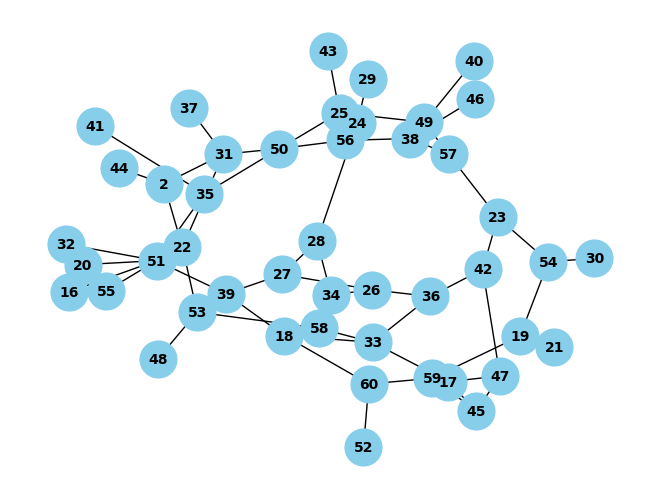

In [358]:
pos = nx.spring_layout(G_new)  # You can use different layout algorithms as well
nx.draw(G_new, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")

# Display the plot}
plt.show()

In [347]:
from matplotlib.lines import Line2D
def plot_graph(G, fig, ax, x1, y1, chsize, nesize, text_lab): # Change this line, pass fig and ax as arguments    pos = list(nx.get_node_attributes(G, 'coord').values())
   # fig = plt.figure(figsize=(20,10))
    #ncfb=nx.current_flow_betweenness_centrality(G)

    pos2=[]

    pos = nx.get_node_attributes(G, 'coord')
    pos = {node: ast.literal_eval(coord) for node, coord in pos.items()}
    pos = {int(k): v for k, v in pos.items()}


    types = nx.get_node_attributes(G, 'TYPE')
    chamber_nodes = [node for node, type_value in types.items() if type_value == 'CHAM']
    nest_nodes = [node for node, type_value in types.items() if type_value == 'NEST EN']
    other_nodes = [node for node, type_value in types.items() if type_value != 'NEST EN' and type_value != 'CHAM']
    junc_nodes = [node for node, type_value in types.items() if type_value == 'JUNC']

    nodelist=list(nx.nodes(G))
    edgelist = list(G.edges())
    # edgelist=list(map(lambda x: (int(x[0]), int(x[1])), edgelist))
    edgelist1 = np.array([(list((ast.literal_eval(G.nodes[u]['coord']))),\
                      list(ast.literal_eval(G.nodes[v]['coord']))) for u, v in edgelist])

    nodelist1 = np.array([list((ast.literal_eval(G.nodes[u]['coord']))) for u in nodelist])
    typelist = np.array([list(G.nodes[u]['TYPE']) for u in nodelist])

    junclist = np.array([list((ast.literal_eval(G.nodes[u]['coord']))) for u in nodelist\
                        if G.nodes[u]['TYPE'] == 'JUNC'])
    nelist = np.array([list((ast.literal_eval(G.nodes[u]['coord']))) for u in nodelist\
                        if G.nodes[u]['TYPE'] == 'NEST EN'])
    chamlist = np.array([list((ast.literal_eval(G.nodes[u]['coord']))) for u in nodelist\
                        if G.nodes[u]['TYPE'] == 'CHAM'])
    endlist = np.array([list((ast.literal_eval(G.nodes[u]['coord']))) for u in nodelist\
                        if G.nodes[u]['TYPE'] == 'END'])
    #ax.scatter(*junclist.T, s=60, ec="w", color="blue", labels=True)
    ax.scatter(*nelist.T, s=nesize, ec="w", color="#83e8da",marker='v', alpha=1)
    #ax.scatter(*endlist.T, s=60, ec="w", color="red")

    try:
        ax.scatter(*chamlist.T, s=chsize, ec="w", color="orange")
    except TypeError:
        pass
 #ax.scatter(*npALL_TE[index].T, s=60, ec="w", color="red")
    #ax.scatter(*npALL_JU[index].T, s=60, ec="w", color="orange", text=npALL_JU[index])
    # ax.scatter(*npALL_NE[index].T, s=60, ec="w", color="green")

    for vizedge in edgelist1: #need dist remove
        ax.plot(*vizedge.T, color="white", linewidth=6)

    # Set 3D projection
    #ax = plt.gca(projection='3d')

    def format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
#         ax.set_xlabel("x", color = 'white', size=20)
#         ax.set_ylabel("y", color = 'white', size=20)
#         ax.set_zlabel("z", color = 'white', size=20)
        #change subplot pane color
        #ax.w_xaxis.set_pane_color(('black'))
        #ax.w_yaxis.set_pane_color(('black'))
        #ax.w_zaxis.set_pane_color(('black'))
    ax.view_init(x1, y1)
    format_axes(ax)
    fig.tight_layout()
#plt.show()

In [348]:
nx.degree(G_new)

DegreeView({'38': 3, '57': 3, '27': 3, '39': 3, '30': 1, '54': 3, '36': 3, '26': 3, '24': 3, '56': 3, '19': 3, '59': 3, '50': 4, '31': 4, '17': 3, '33': 4, '25': 3, '23': 3, '42': 3, '58': 3, '60': 3, '49': 3, '28': 3, '35': 3, '51': 6, '29': 1, '45': 3, '43': 1, '18': 3, '21': 1, '34': 3, '46': 1, '55': 1, '48': 1, '53': 3, '44': 1, '2': 3, '16': 1, '20': 1, '40': 1, '32': 1, '22': 3, '52': 1, '47': 3, '41': 1, '37': 1})

/tmp/ipykernel_144195/3229894452.py:3: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color(color)
/tmp/ipykernel_144195/3229894452.py:4: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color(color)
/tmp/ipykernel_144195/3229894452.py:5: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color(color)
/tmp/ipykernel_144195/1545003621.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  typelist = np.array([list(G.nodes[u]['TYPE']) for u in nodelist])


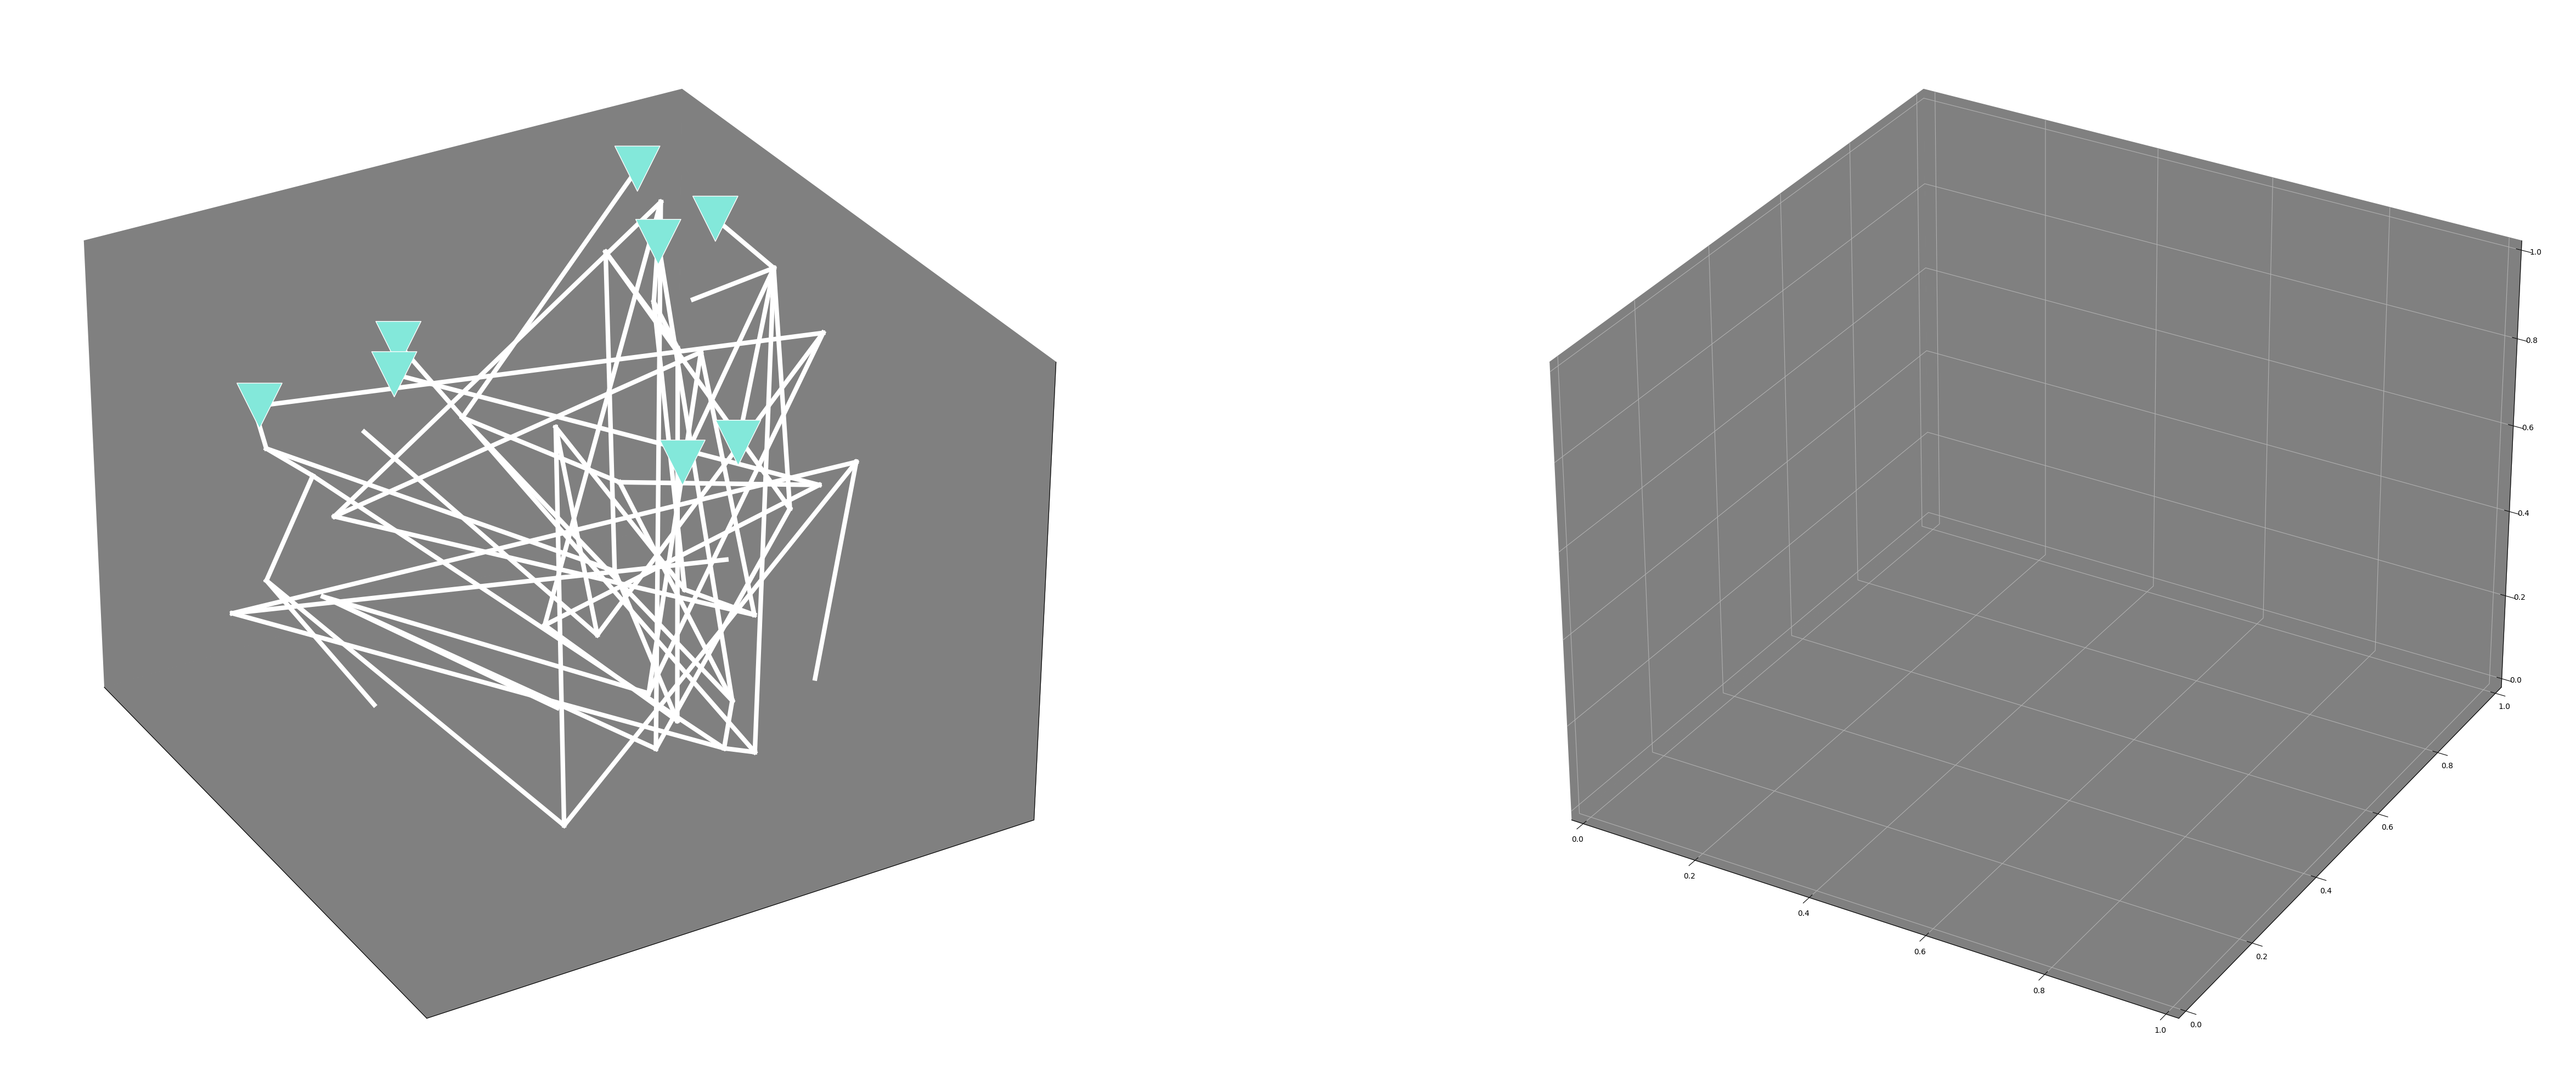

In [359]:
def set_pane_color(ax, color):
    """Set the pane color of a 3D plot."""
    ax.w_xaxis.set_pane_color(color)
    ax.w_yaxis.set_pane_color(color)
    ax.w_zaxis.set_pane_color(color)
start_index=20
x=30
y=330
chsize=5020
nesize=3520
fig = plt.figure(figsize=(60,20))
fig.set_facecolor('white')
text_lab=False
nplot=4
WM=True

if WM==False:
    for i in range(nplot):  # Create 5 plots    
        ax = fig.add_subplot(1, nplot, i+1, projection="3d")  # 1 row, 5 columns, index i+1
        ax.set_facecolor('black')

        G = new_g_list_length[start_index + i]  # Get the graph
        plot_graph(G, fig, ax, x, y,chsize,nesize, text_lab)# Plot the graph
    plt.show()
else:
    ax = fig.add_subplot(1, 2, 1, projection="3d")  # 1 row, 5 columns, index i+1
    ax2 = fig.add_subplot(1, 2, 2, projection="3d")  # 1 row, 5 columns, index i+1

    ax.set_facecolor('white')
    ax2.set_facecolor('white')

    set_pane_color(ax, (0.5, 0.5, 0.5, 1))  # Set pane color to grey for ax
    set_pane_color(ax2, (0.5, 0.5, 0.5, 1))
    
    G = new_g_list_length[0]# Get the graph
    plot_graph(G, fig, ax, x, y,chsize,nesize, text_lab)# Plot the graph

plt.show()

In [55]:
def invert_edge_weights (G_list):
    G_list_inverted=[]
    for g in range(len(G_list)):
        G1=G_list[g]
        G=G1.copy(G1)
        for u, v, data in G.edges(data=True):
            data['weight'] = 1/data['weight']
        G_list_inverted.append(G)
    return G_list_inverted
def divide_edge_weights(G1, G2):
    """
    Returns a graph where edge weights are obtained by dividing weights in G1 by weights in G2.
    Assumes G1 and G2 have the same structure.
    """
    G = G1.copy()
    for (u, v, data) in G1.edges(data=True):
        G[u][v]['weight'] = data['weight'] / G2[u][v]['weight']
    return G

In [61]:
randomisations=100
wed_seq = [96 - i*5 for i in range(20)]
wed_seq.reverse()
mon_seq = [99 - i*5 for i in range(20)]
mon_seq.reverse()
wed_mon_gs=wed_seq+mon_seq
ran=0
num_swaps=1000
new_g_list_length=[]
new_g_list_width=[]
new_Gs=[]
while ran<randomisations:
    for k in range(0, len(G_list_length)):
        G=G_list_length[k].copy()
        tort_list=[]
        width_list=[]
        for (u, v, data) in G.edges(data=True):
            dist = D3.calculate_distance(ast.literal_eval(G.nodes[u]['coord']),\
                                                        ast.literal_eval(G.nodes[v]['coord']))
            length = data['weight']
            tort=length/dist
            tort_list.append(tort)
        Gw=G_list_width[k].copy()
        for (u, v, data) in Gw.edges(data=True):
            width = data['weight']
            width_list.append(width)
        
#         nodes = list(G.nodes())
#         for node in nodes:
#             neighbors = list(G.neighbors(node))
#             for neighbor in neighbors:
#                 G.remove_edge(node, neighbor)
#                 Gw.remove_edge(node, neighbor)
#                 new_neighbor = random.choice([n for n in nodes if n != node and n != neighbor and G.degree(n) != 2])
#                 dist = D3.calculate_distance(ast.literal_eval(G.nodes[node]['coord']),\
#                                              ast.literal_eval(G.nodes[neighbor]['coord']))
#                 tort_n=random.choice(tort_list)
#                 width_n=random.choice(width_list)
#                 G.add_edge(node, new_neighbor, weight=dist*tort_n)
#                 Gw.add_edge(node, new_neighbor, weight=width_n)
        G_new, Gw_new = random_edge_swapping(G, Gw, num_swaps=20, tort_list=tort_list, width_list=width_list, D3=D3)
        attributes = nx.get_node_attributes(G, 'TYPE')
        ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        random_juncs=[]
        while len(random_juncs)<len(ALL_CHAM_NUMS):
            rj=random.choice(ALL_JUNC_NUMS)
            if rj not in random_juncs:
                random_juncs.append(rj)
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_new, {node: {'TYPE': 'JUNC'}})
            nx.set_node_attributes(Gw_new, {node: {'TYPE': 'JUNC'}})

        for node in random_juncs:
            nx.set_node_attributes(G_new, {node: {'TYPE': 'CHAM'}})
            nx.set_node_attributes(Gw_new, {node: {'TYPE': 'CHAM'}})

        new_g_list_length.append(G_new)
        new_g_list_width.append(Gw_new)
        new_Gs.append(divide_edge_weights(G_new, Gw_new))
    ran+=1
        


/tmp/ipykernel_16663/1422167756.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  tort=length/dist


KeyboardInterrupt: 